In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import classification_report 

# machine-learning stack
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt


# miscellaneous
import warnings
warnings.filterwarnings("ignore")


In [2]:
titanic = pd.read_csv("/Users/ozlemunal/Desktop/spiced/my_encounter_notes/week_02/data/train.csv", index_col = 0)
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic["Title"] = titanic["Name"].apply(lambda x: x.split(',')[1].split('.')[0].lower().strip())
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,mr
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,rev
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,miss
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,miss


In [4]:
def trans(x):
    if x in ['mrs','mr','miss','master','dr','rev']:
        return x
    elif x in ['mlle','ms']:
        return "miss"
    elif x in ['mme']:
        return 'mrs'
    elif x in ['col','major','capt']:
        return 'army'
    elif x in ['don','lady','the countess','sir','the count','madam','lord']:
        return 'nobl'
    else :
        return 'unknown'
    

titanic["Title"]=titanic["Title"].apply(trans)

In [5]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,mr


In [6]:
titanic['Title'] = titanic['Title'].map({'miss':0,
                                       'mrs':1,
                                       'mr':2,
                                       'mrs':3,
                                       'miss':4,
                                       'master':5,
                                       'dr':6,
                                       'rev':7,
                                       'army':8,
                                       'nobl':9,
                                       'unknown':10})

In [7]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,4
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2


In [8]:
titanic.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
Title         0
dtype: int64

In [9]:
titanic['Sex_category'] = titanic['Sex'].map({'male':0, 'female':1})
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Sex_category
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,4,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,7,0
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,4,1
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,4,1


In [10]:
titanic["Cabin"].fillna(0, inplace=True)

titanic['Cabin'] = titanic["Cabin"].apply(
    lambda x: 1 if x!=0 else 0
)

titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Sex_category
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,2,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C,3,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,4,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S,3,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S,7,0
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,1,S,4,1
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,0,S,4,1


In [11]:
#titanic["Embarked"].value_counts()

In [12]:
#titanic["Embarked"].fillna("S", inplace=True)
#titanic["Embarked"] = titanic["Embarked"].map({"S":1, "C":2, "Q":3})
#titanic


In [13]:
titanic.isna().sum()

Survived          0
Pclass            0
Name              0
Sex               0
Age             177
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin             0
Embarked          2
Title             0
Sex_category      0
dtype: int64

In [14]:
train,test = train_test_split(titanic, test_size=0.2, random_state=101)
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [15]:
mean_age = round(
    train.groupby(['Pclass','Sex'])['Age'].mean(),1
)
mean_age

Pclass  Sex   
1       female    34.5
        male      41.6
2       female    29.6
        male      30.0
3       female    21.9
        male      26.5
Name: Age, dtype: float64

In [16]:
train['Age'] = train.apply(
    lambda x: mean_age[x['Pclass']][x['Sex']] \
    if x['Age']!=x['Age'] \
    else x['Age'],
    axis=1
)

In [17]:
train.isna().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin           0
Embarked        2
Title           0
Sex_category    0
dtype: int64

In [18]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Title', 'Sex_category'],
      dtype='object')

In [19]:
X = train[["Pclass", "Sex_category", "Age", "SibSp", "Parch", "Cabin", "Title"]]

In [20]:
y = train["Survived"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((534, 7), (178, 7), (534,), (178,))

**Decision Making Tree: Based on 80% of the data**

In [23]:
m_dt = DecisionTreeClassifier(max_depth=3)
m_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

**Random Forest: Based on 120 different data set (shuffled train data)**

In [24]:
rfc = RandomForestClassifier(n_estimators=120)    
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=120)

In [25]:
round(rfc.score(X_train, y_train),3)

0.944

In [32]:
round(rfc.score(X_test, y_test),3)

0.82

In [26]:
rfc.predict_proba(X_test)

array([[0.89458185, 0.10541815],
       [0.        , 1.        ],
       [0.18694444, 0.81305556],
       [1.        , 0.        ],
       [0.93576389, 0.06423611],
       [0.93576389, 0.06423611],
       [0.91666667, 0.08333333],
       [0.83256554, 0.16743446],
       [0.30208333, 0.69791667],
       [1.        , 0.        ],
       [0.05833333, 0.94166667],
       [0.33087302, 0.66912698],
       [0.08055556, 0.91944444],
       [0.80833333, 0.19166667],
       [0.64912698, 0.35087302],
       [1.        , 0.        ],
       [0.08333333, 0.91666667],
       [0.86403108, 0.13596892],
       [0.73939935, 0.26060065],
       [0.95728297, 0.04271703],
       [0.025     , 0.975     ],
       [0.9875    , 0.0125    ],
       [0.275     , 0.725     ],
       [0.47597222, 0.52402778],
       [0.95728297, 0.04271703],
       [0.73402778, 0.26597222],
       [0.11666667, 0.88333333],
       [0.9956417 , 0.0043583 ],
       [0.95728297, 0.04271703],
       [0.83256554, 0.16743446],
       [0.

In [27]:
rfc.predict(X_test)

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1])

In [28]:
importance = rfc.feature_importances_
importance

array([0.09294515, 0.16544099, 0.34129955, 0.07793693, 0.05243882,
       0.05868525, 0.2112533 ])

**Feature importance: Which feature is more important? Colums change and calculate the importance of each column.**

In [29]:
for i,v in enumerate(importance):
        print('Feature: %0d, Score: %.5f' % (i,   v))

Feature: 0, Score: 0.09295
Feature: 1, Score: 0.16544
Feature: 2, Score: 0.34130
Feature: 3, Score: 0.07794
Feature: 4, Score: 0.05244
Feature: 5, Score: 0.05869
Feature: 6, Score: 0.21125


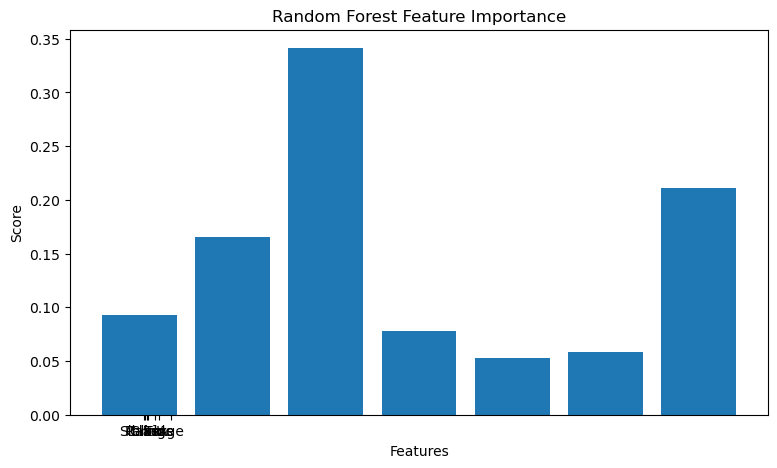

In [43]:
fig = plt.figure(figsize=(9,5))

plt.bar([x for x in range(len(importance))], importance)
plt.title('Random Forest Feature Importance')

plt.xticks(importance, ['Class',  'Sex', 'Age', 'Siblings', 'Parch', 'Cabin', 'Title'])   

plt.ylabel('Score')
plt.xlabel('Features')
plt.show()